In [16]:
%load_ext autoreload
%autoreload 2
from data.visualizations import create_2Dimagegrid
import numpy as np
from server_specific.server_utils import get_patients

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
patients = get_patients()
patient_x = patients[0]
image, mask = patient_x.get_preprocessed_image_mask_tuple()

Now let's get a slice of data in there

In [22]:
z_slice = 80

ccta_scan_slice = image[:, :, z_slice]
mask_slice = mask[:, :, z_slice]

images = [ccta_scan_slice, mask_slice]
titles = ["ccta_scan", "mask"]

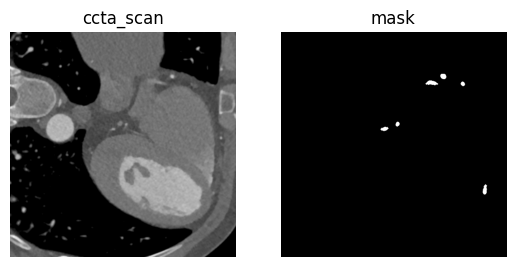

In [23]:
create_2Dimagegrid(images, titles)